# Quick and Easy Technical Analysis Project for Beginners

### Project Objectives: 

1. Explore the available stock data for 4 stocks of your choice over the last three years, and observe any patterns or trends.
2. Calculate Market Capitalization, Moving Averages, Volatility and Stability.
3. Find correlations among the variables of the dataset.
4. Determine which of the stocks would be a better option for stock trading.

## Please Note: 

*This project is only meant for practice. Please do not consider this project to be a complete and reliable implementation for real-world analysis.*

## Step 1: Import the Libraries and Data

Run the following code cells to import the required libraries and the data. 

In [1]:
# Run this code cell to import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas.plotting import scatter_matrix


You can download the necessary data from 'Yahoo Finance'. You can choose any set of 4 stocks that you would like to work with, along with any time period. 

Here, we will be working with **Apple, Amazon, Ford, and Cisco**. 
The time period is from **17th August 2019 to 17th August 2022**.


In [2]:
# Define start and end dates, then import data from yahoo finance for each required stock.
# For now, we will consider Apple (AAPL), Amazon (AMZN), Ford (F), and Cisco (CSCO).
# At the time of writing this code, Amazon and Cisco stocks are gaining, while Apple and Ford are dropping.

start = "2019-08-17"
end = "2022-08-17"

aapl = yf.download("AAPL", start, end)
amzn = yf.download("AMZN", start, end)
ford = yf.download("F", start, end)
csco = yf.download("CSCO", start, end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Display one of the stocks data

aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-16,51.070000,51.790001,50.959999,51.625000,50.424465,110481600
2019-08-19,52.654999,53.182499,52.507500,52.587502,51.364590,97654400
2019-08-20,52.720001,53.337502,52.580002,52.590000,51.367023,107537200
2019-08-21,53.247501,53.412498,52.900002,53.160000,51.923771,86141600
2019-08-22,53.297501,53.610001,52.687500,53.115002,51.879814,89014800
...,...,...,...,...,...,...
2022-08-10,167.679993,169.339996,166.899994,169.240005,168.959732,70170500
2022-08-11,170.059998,170.990005,168.190002,168.490005,168.210968,57149200
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.814987,68039400


## Step 2: Summarize the Dataframes

Examine the data by finding out the following information:
* Data type of each column
* Total number of elements in each column
* Total number of null values in each column
* Percentage of null values



In [4]:
# Obtain the necessary information for each stock 

def get_info(dataframe) :
    stock_info = pd.DataFrame({
                    'Datatype' : dataframe.dtypes, # Data types of columns
                    'Total_Element': dataframe.count(), # Total elements in columns
                    'Null_Count': dataframe.isnull().sum(), # Total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100 # Percentage of null values
                       })
    return stock_info

In [5]:
# Call the function for stock 1

get_info(aapl)


,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.0
High,float64,756,0,0.0
Low,float64,756,0,0.0
Close,float64,756,0,0.0
Adj Close,float64,756,0,0.0
Volume,int64,756,0,0.0


In [6]:
# Call the function for stock 2

get_info(amzn)


,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.0
High,float64,756,0,0.0
Low,float64,756,0,0.0
Close,float64,756,0,0.0
Adj Close,float64,756,0,0.0
Volume,int64,756,0,0.0


In [7]:
# Call the function for stock 3

get_info(ford)


,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.0
High,float64,756,0,0.0
Low,float64,756,0,0.0
Close,float64,756,0,0.0
Adj Close,float64,756,0,0.0
Volume,int64,756,0,0.0


In [8]:
# Call the function for stock 4

get_info(csco)


,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.0
High,float64,756,0,0.0
Low,float64,756,0,0.0
Close,float64,756,0,0.0
Adj Close,float64,756,0,0.0
Volume,int64,756,0,0.0


Describe the numerical data by displaying the count, mean, standard deviation, minimum value, inter-quartile ranges, and the maximum value.

In [9]:
# Describe the numerical data for stock 1

aapl.describe()


,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,119.247613,120.728221,117.856395,119.371713,118.196932,1.144619e+08
std,37.083133,37.497358,36.653021,37.085230,37.267583,5.597946e+07
min,51.025002,51.430000,50.250000,50.660000,49.481903,4.100000e+07
25%,80.221249,80.946249,79.539373,80.290627,78.705477,7.831732e+07
50%,126.579998,127.910000,125.154999,126.561249,125.127918,9.875770e+07
75%,148.370003,149.472504,146.719997,148.499996,147.514359,1.316203e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,4.265100e+08


In [10]:
# Describe the numerical data for stock 2

amzn.describe()


,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,140.086599,141.798980,138.241583,140.019760,140.019760,7.943153e+07
std,30.897434,31.127538,30.522419,30.772703,30.772703,3.513270e+07
min,82.075500,86.250000,81.301498,83.830498,83.830498,1.762600e+07
25%,111.035000,113.218502,107.897501,110.572498,110.572498,5.605850e+07
50%,154.873245,156.616753,151.846001,154.467499,154.467499,6.911700e+07
75%,164.766998,166.303131,162.958881,164.633247,164.633247,9.323450e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


In [11]:
# Describe the numerical data for stock 3

ford.describe()


,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,11.497857,11.689974,11.293347,11.490384,11.084931,7.274372e+07
std,4.434238,4.530085,4.337472,4.438632,4.336411,3.699267e+07
min,4.270000,4.420000,3.960000,4.010000,3.863936,1.188160e+07
25%,8.210000,8.320000,8.087500,8.207500,7.908543,4.911732e+07
50%,11.345000,11.580000,11.155000,11.380000,11.028306,6.480815e+07
75%,14.415000,14.655000,14.132500,14.320000,13.880039,8.752058e+07
max,24.870001,25.870001,24.370001,25.190001,24.394672,3.116452e+08


In [12]:
# Describe the numerical data for stock 4

csco.describe()


,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,48.523638,49.013545,48.040608,48.546997,46.075810,2.186190e+07
std,6.089673,6.065807,6.116582,6.093930,6.481387,1.068927e+07
min,33.230000,35.820000,32.400002,33.200001,30.455847,5.720500e+06
25%,44.387500,44.799999,44.070000,44.380001,42.018888,1.564475e+07
50%,47.475000,47.855001,47.099998,47.509998,44.101629,1.901840e+07
75%,53.842500,54.147499,53.252501,53.752501,51.779101,2.431612e+07
max,64.040001,64.290001,63.549999,63.959999,62.013485,1.069283e+08


## Step 3: Comparison of Stocks

Compare the average volume of stocks traded.



In [13]:
# Find the average of the volume of stocks traded over time for each stock.
# Round off the value.

aapl_vol_avg = round(aapl["Volume"].mean())
amzn_vol_avg = round(amzn["Volume"].mean())
ford_vol_avg = round(ford["Volume"].mean())
csco_vol_avg = round(csco["Volume"].mean())



In [14]:
# Run this code cell to convert the results into an array

vol_avg = np.array([aapl_vol_avg, amzn_vol_avg, ford_vol_avg, csco_vol_avg])
vol_avg

array([114461905,  79431532,  72743721,  21861895])

### Find the Stock with the Highest Trading Volume

Create a pie chart to visualize this data and find the stock with the highest trading volume. The pie chart would look something like this:

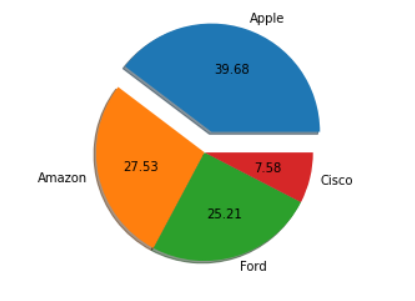



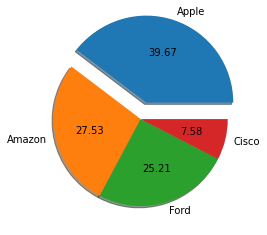

In [15]:
# Create the pie chart

mylabels = ["Apple", "Amazon", "Ford", "Cisco"]
myexplode = [0.2, 0, 0, 0] # To create an exploding wedge

plt.pie(vol_avg, labels = mylabels, explode = myexplode, shadow = True, autopct="%.2f")

plt.show() 

**Conclusion:**

From the pie chart, we find that Apple has the highest average trade volume, followed by Amazon, Ford, and Cisco. 



### Find the Stock that is Traded the Most

Visualize the volume of stocks traded with time to find the stock that is traded the most.

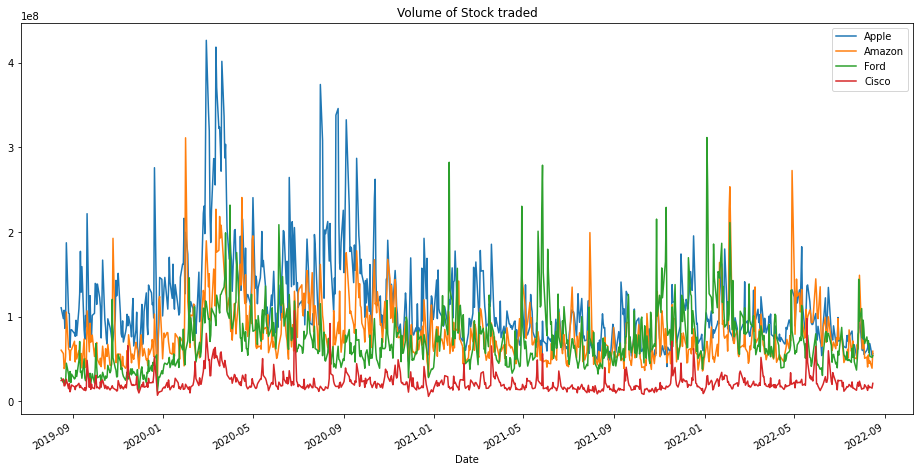

In [16]:
# Perform the visualization in a single graph

aapl['Volume'].plot(label = 'Apple', figsize = (16,8))
amzn['Volume'].plot(label = "Amazon")
ford['Volume'].plot(label = 'Ford')
csco['Volume'].plot(label = 'Cisco')

plt.title('Volume of Stock traded')
plt.legend()

**Conclusion:**

From the graph, we find that:

Apple is traded the most, followed by Ford and Amazon, and then Cisco.

### Find the Highest Price of Stocks Traded with Time

Visualize the highest price of stocks traded with time. 


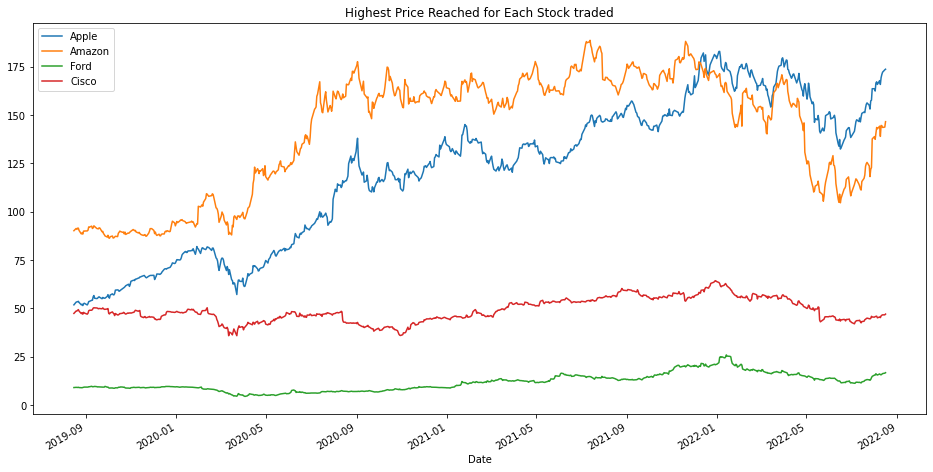

In [17]:

aapl['High'].plot(label = 'Apple', figsize = (16,8))
amzn['High'].plot(label = "Amazon")
ford['High'].plot(label = 'Ford')
csco['High'].plot(label = 'Cisco')

plt.title('Highest Price Reached for Each Stock traded')
plt.legend()

**Go through the following observations and check if they are true for your graph (assuming you are using the same stocks and time period).** 

*If you are using different data, try to come up with similar observations pertaining to your data.*

The graph shows us the highest prices that each stock has reached over time. We see that:

* Amazon has the highest price until the end of 2021, and by January 2022, the price of Amazon drops below Apple.

* Amazon and Apple show almost similar trends until the end of 2021. 

* Amazon displays mostly an increase in the highest price, with a sharp drop in price first by the end of 2021, and then before May 2022. The price begins increasing again between May and August 2022. 

* Apple displays mostly an increase in the highest price, with a sharp drop in price before May 2022. The price begins increasing again between May and August 2022.

* Ford and Cisco show almost consistent trends in the highest stock price. 

### Find the Lowest Prices of Stocks Traded with Time

Visualize the lowest price of stocks traded with time. 



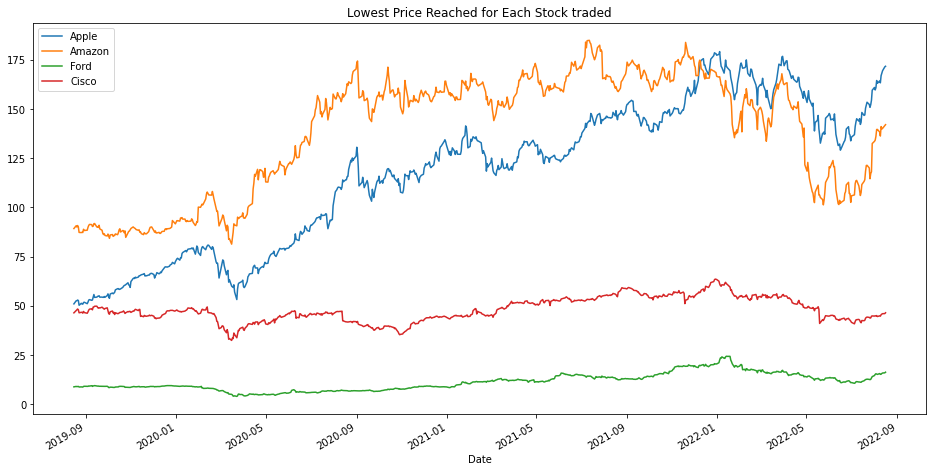

In [18]:

aapl['Low'].plot(label = 'Apple', figsize = (16,8))
amzn['Low'].plot(label = "Amazon")
ford['Low'].plot(label = 'Ford')
csco['Low'].plot(label = 'Cisco')

plt.title('Lowest Price Reached for Each Stock traded')
plt.legend()

### Find the Open Price of Stocks Traded with Time

Visualize the open price of stocks traded with time. 



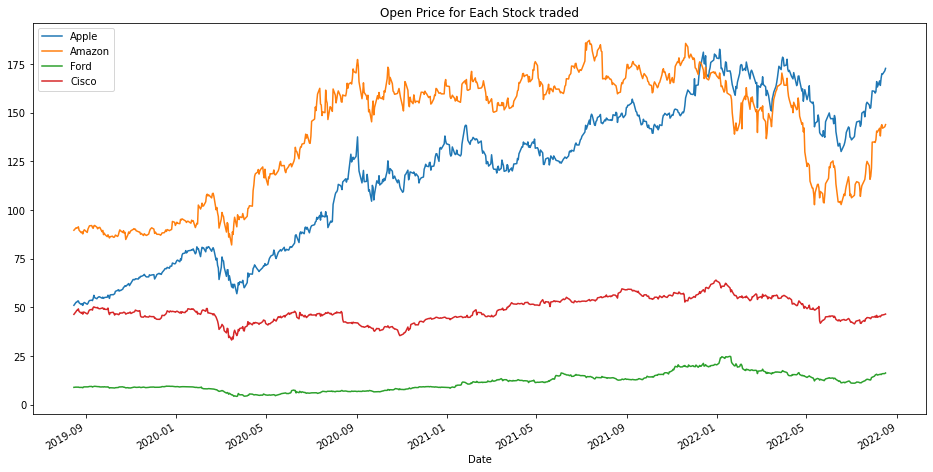

In [19]:

aapl['Open'].plot(label = 'Apple', figsize = (16,8))
amzn['Open'].plot(label = "Amazon")
ford['Open'].plot(label = 'Ford')
csco['Open'].plot(label = 'Cisco')

plt.title('Open Price for Each Stock traded')
plt.legend()

For the given data, it is interesting to note that the graphs are quite similar to each other.

## Step 4: Market Capitalization

This gives the value of a company that is traded in the stock market. This allows investors to understand how valuable a company is perceived to be by investors. 

The size and value of a company gives the level of risk one might expect when investing in its stock, as well as how much an investment might return over time.

It is found by calculating the product of the total number of shares with the present price of shares. 

M_Cap = Total Number of Shares * Present Shares Price

### Determine the Stocks that Would Provide Lower Risk with Greater Returns Over Time

Find the market capitalization values for each of the 4 stocks and visualize the results to determine which stocks would provide a lower risk, with greater returns over time.

In [20]:
aapl['M_Cap'] = aapl['Open'] * aapl['Volume']
amzn['M_Cap'] = amzn['Open'] * amzn['Volume']
ford['M_Cap'] = ford['Open'] * ford['Volume']
csco['M_Cap'] = csco['Open'] * csco['Volume']



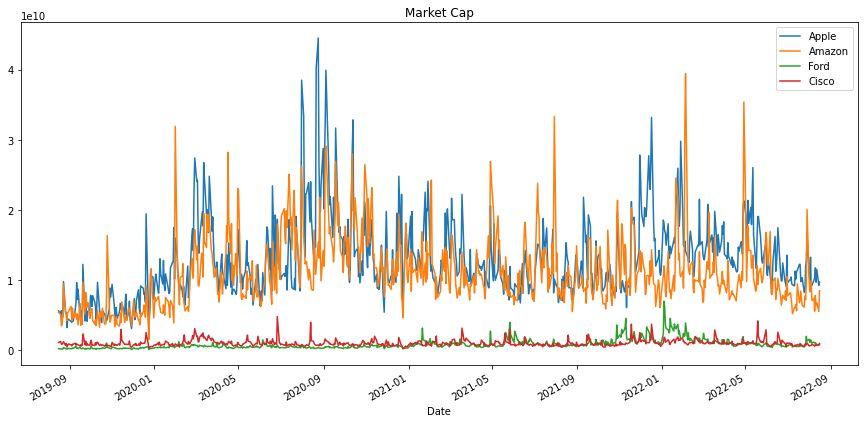

In [21]:
aapl['M_Cap'].plot(label = 'Apple', figsize = (15,7))
amzn['M_Cap'].plot(label = 'Amazon')
ford['M_Cap'].plot(label = 'Ford')
csco['M_Cap'].plot(label = 'Cisco')

plt.title('Market Cap')
plt.legend()


**Conclusion:**

Apple and Amazon are traded more compared to Cisco and Ford.

Thus, we can conclude that investing in Apple and Amazon would provide a lower risk, with greater returns over time.

## Step 5: Moving Averages

Moving Averages are used to deal with price fluctuations, since stock prices are extremely volatile and change rapidly over time. We can use the help of 50-day and 200-day averages to look for trends. 

In general, an upward trend in a moving average might imply an increase in the price or momentum of a security, while a downward trend would be seen as a decline.
The 200-day moving average is considered especially significant in stock trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend, i.e., the price of the stock is expected to rise.

### Determine the Stocks that Have Significant Upward Trends

Find the Moving Averages for each of the 4 stocks and compare them to find which stocks have significant upward trends. 



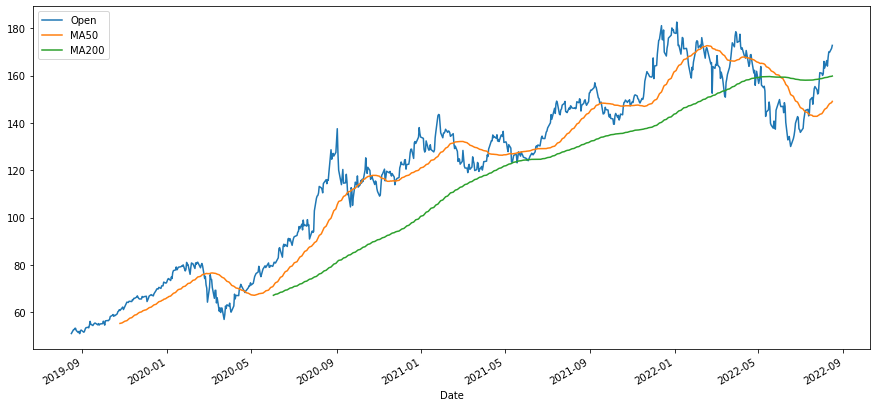

In [22]:
# Example for a single stock

aapl['MA50'] = aapl['Open'].rolling(50).mean()
aapl['MA200'] = aapl['Open'].rolling(200).mean()

# Plot

aapl['Open'].plot(figsize = (15,7))
aapl['MA50'].plot()
aapl['MA200'].plot()
plt.legend()

In [23]:
# Find the MA for all the stocks

aapl['MA50'] = aapl['Open'].rolling(50).mean()
aapl['MA200'] = aapl['Open'].rolling(200).mean()

amzn['MA50'] = amzn['Open'].rolling(50).mean()
amzn['MA200'] = amzn['Open'].rolling(200).mean()

ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()

csco['MA50'] = csco['Open'].rolling(50).mean()
csco['MA200'] = csco['Open'].rolling(200).mean()

<AxesSubplot:title={'center':'Cisco'}, xlabel='Date'>

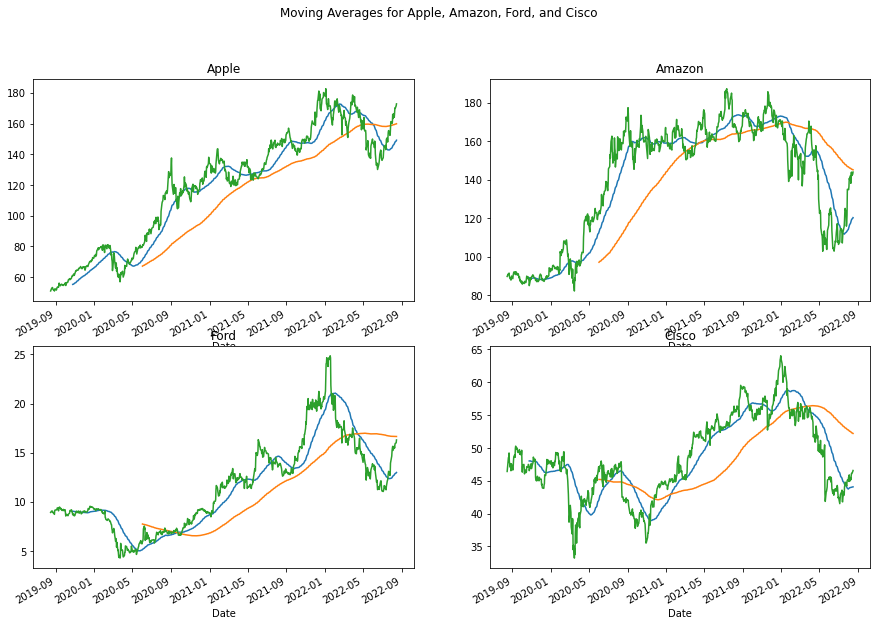

In [24]:
# Plot them together to compare them

figure, axes = plt.subplots(2, 2, figsize = (15, 10))

figure.suptitle('Moving Averages for Apple, Amazon, Ford, and Cisco')

axes[0,0].set_title('Apple')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Ford')
axes[1,1].set_title('Cisco')


aapl['MA50'].plot(ax=axes[0, 0])
aapl['MA200'].plot(ax=axes[0, 0])
aapl['Open'].plot(ax=axes[0, 0])

amzn['MA50'].plot(ax=axes[0, 1])
amzn['MA200'].plot(ax=axes[0, 1])
amzn['Open'].plot(ax=axes[0, 1])

ford['MA50'].plot(ax=axes[1, 0])
ford['MA200'].plot(ax=axes[1, 0])
ford['Open'].plot(ax=axes[1, 0])

csco['MA50'].plot(ax=axes[1, 1])
csco['MA200'].plot(ax=axes[1, 1])
csco['Open'].plot(ax=axes[1, 1])

**Conclusion:**

From the graphs, we observe that Apple and Amazon have significant upward trends, when compared to Ford and Cisco.



## Step 6: Volatility and Stability

A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.

The formula is:

rt =(Pt/Pt-1) -1, where,

rt = Return,
Pt = Price at time T,
Pt-1 = Price at time T-1.


Most investors fear volatility, they want stability.

With the help of histograms, we can find out whether a stock is stable or volatile. The thicker our histogram is the more volatile the stock is.

### Compare Volatility and Stability

Find and compare the volatility and stability for each of the 4 stocks and determine which stock appears to be the most volatile.

<AxesSubplot:>

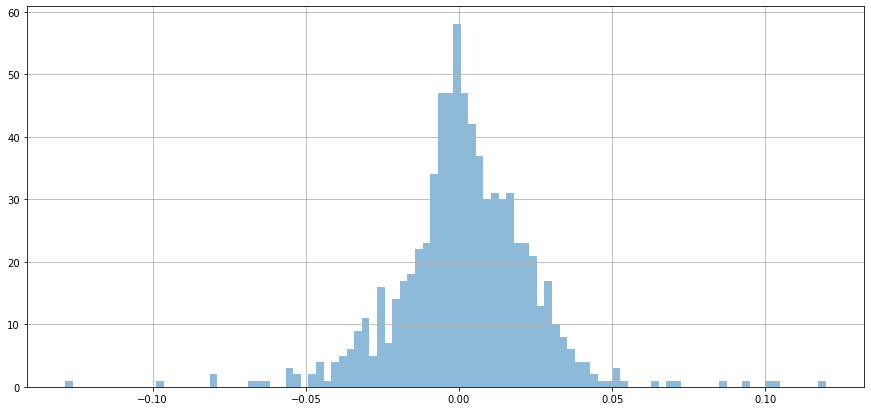

In [25]:
# Example to find the precentage increase in value for one of the stocks and then visualize it graphically.

aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
# The .shift() command in Python is used either to push all rows in a DataFrame or to use the previous row in a DataFrame.

# Plot
aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, figsize = (15,7))

<AxesSubplot:title={'center':'Cisco'}>

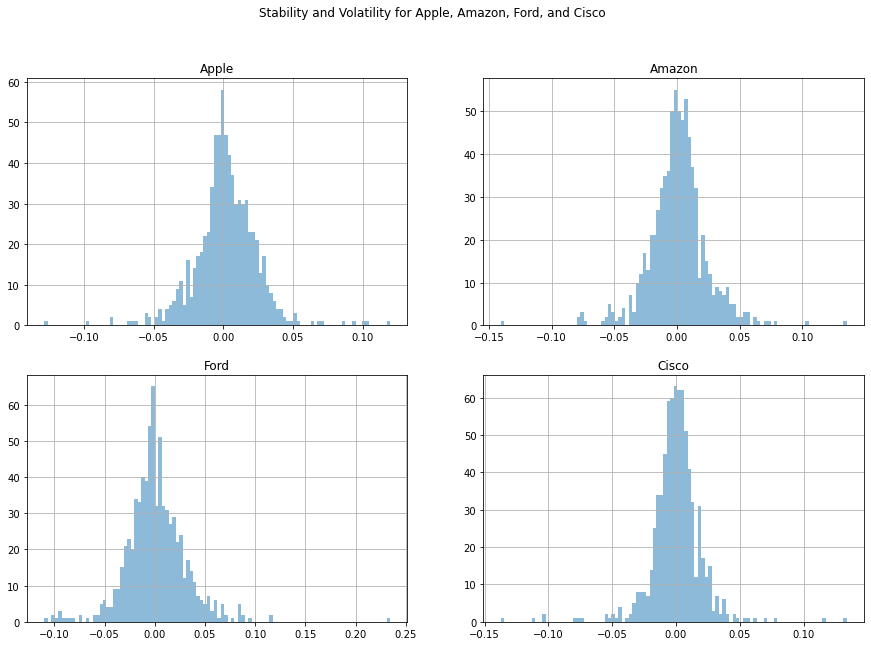

In [26]:
# Finding the volatility / stability for each of the stocks.

aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
amzn['returns'] = (amzn['Close']/amzn['Close'].shift(1)) -1
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) -1
csco['returns'] = (csco['Close']/csco['Close'].shift(1)) -1


# Visualize the results.

figure, axes = plt.subplots(2, 2, figsize = (15, 10))

figure.suptitle('Stability and Volatility for Apple, Amazon, Ford, and Cisco')

axes[0,0].set_title('Apple')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Ford')
axes[1,1].set_title('Cisco')

aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, ax=axes[0, 0])

amzn['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5, ax=axes[0, 1])

ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5, ax=axes[1, 0])

csco['returns'].hist(bins = 100, label = 'Cisco', alpha = 0.5, ax=axes[1, 1])

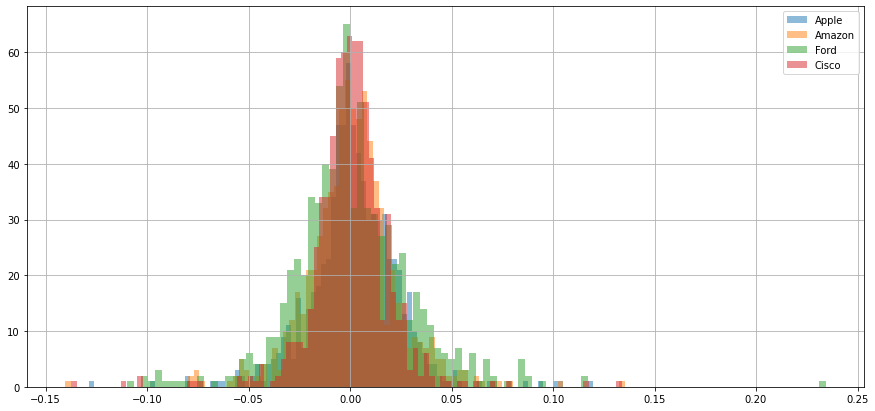

In [27]:
# Comparing the volatility / stability for all the stocks.


aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
amzn['returns'] = (amzn['Close']/amzn['Close'].shift(1))-1
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
csco['returns'] = (csco['Close']/csco['Close'].shift(1)) - 1

aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, figsize = (15,7))
amzn['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5)
ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5)
csco['returns'].hist(bins = 100, label = 'Cisco', alpha = 0.5)

plt.legend()

**Conclusion:**

From the graphs, we can see that Ford appears to be the most volatile stock.



## Step 7: Correlations

### Create Correlation Tables

Find correlations between each variable of the dataframe with the help of a correlation table.


In [28]:
# Correlation table for Stock 1

aapl_corr = aapl.corr()
aapl_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200,returns
Open,1.000000,0.999456,0.999282,0.998514,0.998473,-0.389693,0.326029,0.963752,0.860945,-0.048263
High,0.999456,1.000000,0.999167,0.999268,0.999250,-0.378988,0.336462,0.965182,0.863581,-0.034055
Low,0.999282,0.999167,1.000000,0.999302,0.999270,-0.403844,0.309103,0.962313,0.863604,-0.029909
Close,0.998514,0.999268,0.999302,1.000000,0.999970,-0.392222,0.321375,0.963160,0.863806,-0.008943
Adj Close,0.998473,0.999250,0.999270,0.999970,1.000000,-0.393162,0.319537,0.964240,0.869220,-0.009556
Volume,-0.389693,-0.378988,-0.403844,-0.392222,-0.393162,1.000000,0.690510,-0.443609,-0.516702,-0.045160
M_Cap,0.326029,0.336462,0.309103,0.321375,0.319537,0.690510,1.000000,0.184322,-0.157396,-0.064986
MA50,0.963752,0.965182,0.962313,0.963160,0.964240,-0.443609,0.184322,1.000000,0.937019,-0.061546
MA200,0.860945,0.863581,0.863604,0.863806,0.869220,-0.516702,-0.157396,0.937019,1.000000,-0.060656
returns,-0.048263,-0.034055,-0.029909,-0.008943,-0.009556,-0.045160,-0.064986,-0.061546,-0.060656,1.000000


In [29]:
# Correlation table for Stock 2

amzn_corr = amzn.corr()
amzn_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200,returns
Open,1.000000,0.998698,0.998509,0.996875,0.996875,-0.100514,0.378204,0.922038,0.198817,-0.034953
High,0.998698,1.000000,0.998138,0.998541,0.998541,-0.082298,0.394043,0.923573,0.198225,-0.008385
Low,0.998509,0.998138,1.000000,0.998537,0.998537,-0.120048,0.358099,0.918577,0.201781,-0.006015
Close,0.996875,0.998541,0.998537,1.000000,1.000000,-0.100492,0.375682,0.920015,0.197467,0.024756
Adj Close,0.996875,0.998541,0.998537,1.000000,1.000000,-0.100492,0.375682,0.920015,0.197467,0.024756
Volume,-0.100514,-0.082298,-0.120048,-0.100492,-0.100492,1.000000,0.856928,-0.172742,-0.302290,0.008557
M_Cap,0.378204,0.394043,0.358099,0.375682,0.375682,0.856928,1.000000,0.256546,-0.263668,-0.011579
MA50,0.922038,0.923573,0.918577,0.920015,0.920015,-0.172742,0.256546,1.000000,0.537860,-0.074832
MA200,0.198817,0.198225,0.201781,0.197467,0.197467,-0.302290,-0.263668,0.537860,1.000000,-0.073423
returns,-0.034953,-0.008385,-0.006015,0.024756,0.024756,0.008557,-0.011579,-0.074832,-0.073423,1.000000


In [30]:
# Correlation table for Stock 3

ford_corr = ford.corr()
ford_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200,returns
Open,1.000000,0.999060,0.999015,0.997932,0.997652,0.221455,0.715221,0.930754,0.734835,-0.005510
High,0.999060,1.000000,0.998897,0.999071,0.998908,0.239232,0.728337,0.930264,0.735410,0.017619
Low,0.999015,0.998897,1.000000,0.999057,0.998609,0.206468,0.704953,0.929119,0.734386,0.014662
Close,0.997932,0.999071,0.999057,1.000000,0.999688,0.224853,0.717836,0.928633,0.734562,0.038493
Adj Close,0.997652,0.998908,0.998609,0.999688,1.000000,0.229648,0.718677,0.931370,0.745398,0.037946
Volume,0.221455,0.239232,0.206468,0.224853,0.229648,1.000000,0.786279,0.128703,0.074014,0.124886
M_Cap,0.715221,0.728337,0.704953,0.717836,0.718677,0.786279,1.000000,0.603608,0.388018,0.080811
MA50,0.930754,0.930264,0.929119,0.928633,0.931370,0.128703,0.603608,1.000000,0.853239,-0.052224
MA200,0.734835,0.735410,0.734386,0.734562,0.745398,0.074014,0.388018,0.853239,1.000000,-0.062815
returns,-0.005510,0.017619,0.014662,0.038493,0.037946,0.124886,0.080811,-0.052224,-0.062815,1.000000


In [31]:
# Correlation table for Stock 4

csco_corr = csco.corr()
csco_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200,returns
Open,1.000000,0.997000,0.997554,0.994220,0.981080,-0.290142,-0.008666,0.870440,0.528770,-0.014029
High,0.997000,1.000000,0.996044,0.997225,0.984995,-0.261859,0.018201,0.877558,0.534919,0.017803
Low,0.997554,0.996044,1.000000,0.996934,0.983260,-0.313091,-0.032449,0.861539,0.516927,0.022065
Close,0.994220,0.997225,0.996934,1.000000,0.986860,-0.285431,-0.005868,0.868057,0.523950,0.063787
Adj Close,0.981080,0.984995,0.983260,0.986860,1.000000,-0.271831,0.004478,0.886019,0.601711,0.054905
Volume,-0.290142,-0.261859,-0.313091,-0.285431,-0.271831,1.000000,0.949913,-0.122214,0.017018,-0.158690
M_Cap,-0.008666,0.018201,-0.032449,-0.005868,0.004478,0.949913,1.000000,0.116399,0.173835,-0.166262
MA50,0.870440,0.877558,0.861539,0.868057,0.886019,-0.122214,0.116399,1.000000,0.752754,-0.056841
MA200,0.528770,0.534919,0.516927,0.523950,0.601711,0.017018,0.173835,0.752754,1.000000,-0.062734
returns,-0.014029,0.017803,0.022065,0.063787,0.054905,-0.158690,-0.166262,-0.056841,-0.062734,1.000000


### Generate Heatmaps

Visualize the correlations with heatmaps.


Note down your observations.

<AxesSubplot:>

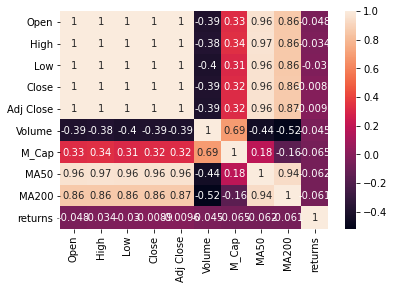

In [32]:
# Heatmap for Stock 1

sns.heatmap(aapl_corr, annot=True)


<AxesSubplot:>

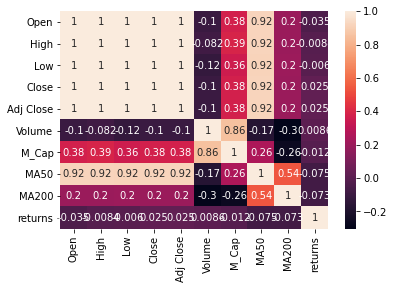

In [33]:
# Heatmap for Stock 2

sns.heatmap(amzn_corr, annot=True)


<AxesSubplot:>

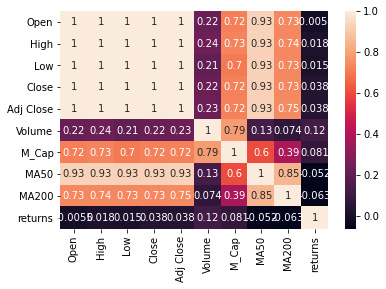

In [34]:
# Heatmap for Stock 3

sns.heatmap(ford_corr, annot=True)


<AxesSubplot:>

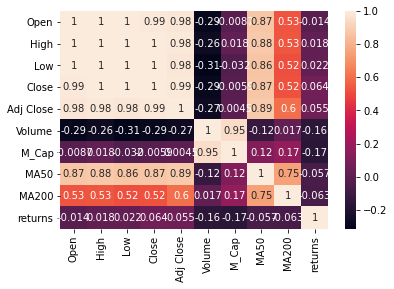

In [35]:
# Heatmap for Stock 4

sns.heatmap(csco_corr, annot=True)


**Conclusion:**

From the heatmaps, we find that for Apple, Amazon, and Cisco, Volume is negatively correlated to Open, High, Low, close, and Adj Close.

For Ford, Volume is positively correlated to Open, High, Low, close, and Adj Close.

## Step 8: Final Conclusion of the Analysis

From our analysis, we can conclude that among the four stocks that we have chosen, Apple might be a better option for stock trading.